<a href="https://colab.research.google.com/github/oprostep/2024-Spring-DS/blob/main/240613_DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

pd.set_option("display.max_rows" ,100)
pd.set_option("display.max_columns" ,100)
sns.set_style("whitegrid")

In [52]:
targetUrl = "https://raw.githubusercontent.com/oprostep/2024-Spring-DS/main/smartphone_cleaned_v5.csv"

# Parsing
df = pd.read_csv(targetUrl, sep=',', dtype={'fast_charging_available': bool, 'extended_memory_available':bool})
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,True,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,False,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,True,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,True,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,True,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,True,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,True,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,True,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,True,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,False,NaN


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    bool   
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

결측치가 존재하는 항목 다수 확인 가능, 또한 object로 표기된 범주형 자료를 전처리할 필요가 있음

### Target : 'price'
### Features : other attributes

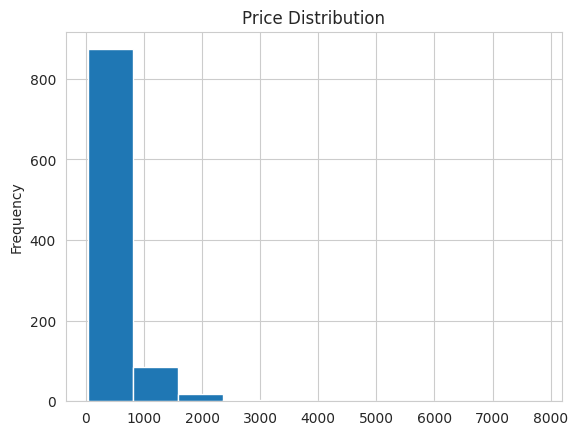

In [54]:
df['price'] = round(df['price']*0.012, 2)
df['price'].plot(kind='hist', title='Price Distribution');

In [55]:
high_cost_devices = df[df['price']>3000]
high_cost_devices

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,7800.0,62.0,False,True,False,snapdragon,8.0,1.5,2275.0,False,NaN,2.0,64.0,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,False,NaN
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,5760.0,88.0,False,True,False,snapdragon,8.0,2.8,4000.0,True,27.0,8.0,256.0,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,False,NaN


___

In [56]:
df[df['processor_brand'].isna()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
118,tesla,Tesla Pi Phone,839.99,83.0,True,True,False,NaN,8.0,NaN,5000.0,True,120.0,16.0,512.0,6.73,165,1080 x 2448,3,1.0,android,50.0,32.0,False,NaN
143,jio,Jio Phone 3,53.99,NaN,False,False,False,NaN,4.0,1.4,2800.0,False,NaN,2.0,64.0,5.00,60,720 x 1280,1,1.0,android,5.0,2.0,True,128.0
187,ikall,iKall Z19 Pro,97.19,60.0,False,False,False,NaN,4.0,1.6,5000.0,False,NaN,4.0,64.0,6.50,60,720 x 1600,1,1.0,android,13.0,8.0,True,128.0
200,samsung,Samsung Galaxy A13,173.40,75.0,False,False,False,NaN,8.0,2.0,5000.0,True,25.0,4.0,64.0,6.60,60,1080 x 2408,4,1.0,android,50.0,8.0,True,1024.0
307,samsung,Samsung Galaxy A13 (4GB RAM + 128GB),179.99,75.0,False,False,False,NaN,8.0,2.0,5000.0,True,25.0,4.0,128.0,6.60,60,1080 x 2408,4,1.0,android,50.0,8.0,True,1024.0
313,itel,itel S16 Pro,83.88,NaN,False,False,False,NaN,4.0,1.3,4000.0,False,NaN,2.0,32.0,6.60,60,1600 x 720,3,1.0,android,8.0,8.0,True,32.0
490,samsung,Samsung Galaxy A15,191.88,63.0,False,False,False,NaN,8.0,NaN,5000.0,True,NaN,6.0,64.0,6.50,60,720 x 1600,3,1.0,android,48.0,8.0,True,1024.0
523,samsung,Samsung Galaxy F14,179.88,67.0,False,True,False,NaN,8.0,NaN,5000.0,True,25.0,4.0,64.0,6.62,60,2408 x 1080,3,1.0,android,50.0,16.0,True,1024.0
575,samsung,Samsung Galaxy A13 (6GB RAM + 128GB),197.99,78.0,False,False,False,NaN,8.0,2.0,5000.0,True,25.0,6.0,128.0,6.60,60,1080 x 2408,4,1.0,android,50.0,8.0,True,1024.0
733,ikall,iKall Z19,95.99,61.0,False,False,False,NaN,4.0,1.6,5000.0,False,NaN,4.0,32.0,6.50,60,720 x 1600,1,1.0,android,20.0,13.0,True,128.0


# Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler